# 1. Data Analysis

In [1]:
setwd("/Users/phucvu/R")
#setwd("/home/phucvu/R")

In [2]:
df <- read.table("adult.data", 
                 sep = ',', 
                 fill = FALSE, 
                 strip.white = TRUE)

colnames(df) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", 
                 "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
                 "hours_per_week", "native_country", "salary")

**Type de données de dataset**

In [3]:
sapply(df, class)

age      workclass         fnlwgt      education  education_num 
     "integer"       "factor"      "integer"       "factor"      "integer" 
marital_status     occupation   relationship           race            sex 
      "factor"       "factor"       "factor"       "factor"       "factor" 
  capital_gain   capital_loss hours_per_week native_country         salary 
     "integer"      "integer"      "integer"       "factor"       "factor"

In [4]:
head(df)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
library(ggplot2)
library(scales)
library(plyr)
#library(dplyr)
library(data.table)
library(caret)
library(reshape2)

#Decision tree package
library(rpart)
library(rpart.plot)
library(e1071)

#Encoder
library(CatEncoders)

#Classification
library(class)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: lattice

Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt


Attaching package: ‘CatEncoders’

The following object is masked from ‘package:base’:

    transform



**Dimension de dataset**

In [6]:
cat("Nombre de colonne, Nombre de lignes: ", dim(df))

Nombre de colonne, Nombre de lignes:  32561 15

In [7]:
str(df)

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 9 levels "?","Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 16 levels "10th","11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 15 levels "?","Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours_per_week: int  40 1

Le dataset contient 9 varaibles catérogique et 6 variables numériques

income est la variable ciblée

## 1.1 Caractéristiques statistique de dataset

In [8]:
summary(df)

      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :22696   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 2541   1st Qu.: 117827  
 Median :37.00   Local-gov       : 2093   Median : 178356  
 Mean   :38.58   ?               : 1836   Mean   : 189778  
 3rd Qu.:48.00   State-gov       : 1298   3rd Qu.: 237051  
 Max.   :90.00   Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)         :  981                    
        education     education_num                 marital_status 
 HS-grad     :10501   Min.   : 1.00   Divorced             : 4443  
 Some-college: 7291   1st Qu.: 9.00   Married-AF-spouse    :   23  
 Bachelors   : 5355   Median :10.00   Married-civ-spouse   :14976  
 Masters     : 1723   Mean   :10.08   Married-spouse-absent:  418  
 Assoc-voc   : 1382   3rd Qu.:12.00   Never-married        :10683  
 11th        : 1175   Max.   :16.00   Separated            : 1025  
 (Other)     : 5134                   Widowe

**Nombre de valeur null dans toutes les colonnes**

In [9]:
colSums(is.na(df))

age      workclass         fnlwgt      education  education_num 
             0              0              0              0              0 
marital_status     occupation   relationship           race            sex 
             0              0              0              0              0 
  capital_gain   capital_loss hours_per_week native_country         salary 
             0              0              0              0              0

**Nombre de valeur ? dans toutes les colonnes**

In [10]:
#colSums(df.isin("?")) ##TODO

## 1.2 Explorer les variables catégoriques

**Extraire des variables catéroriques**

In [11]:
categorical <- vector()
for (i in colnames(df)){
    if (is.factor(df[[i]])) {
        categorical <- c(categorical, i)
    }  
}

In [12]:
categorical

[1] "workclass"      "education"      "marital_status" "occupation"    
[5] "relationship"   "race"           "sex"            "native_country"
[9] "salary"

**Explorer la varaible salary**

In [13]:
sum(is.na(df$salary))

[1] 0

Il n'y a aucun de valeur null dans la variable ciblée income

In [14]:
unique(df$salary)

[1] <=50K >50K 
Levels: <=50K >50K

Les deux valeurs uniques présentées dans la variable salary est <= 50K et >50K

In [15]:
count(df$salary)

x,freq
<=50K,24720
>50K,7841


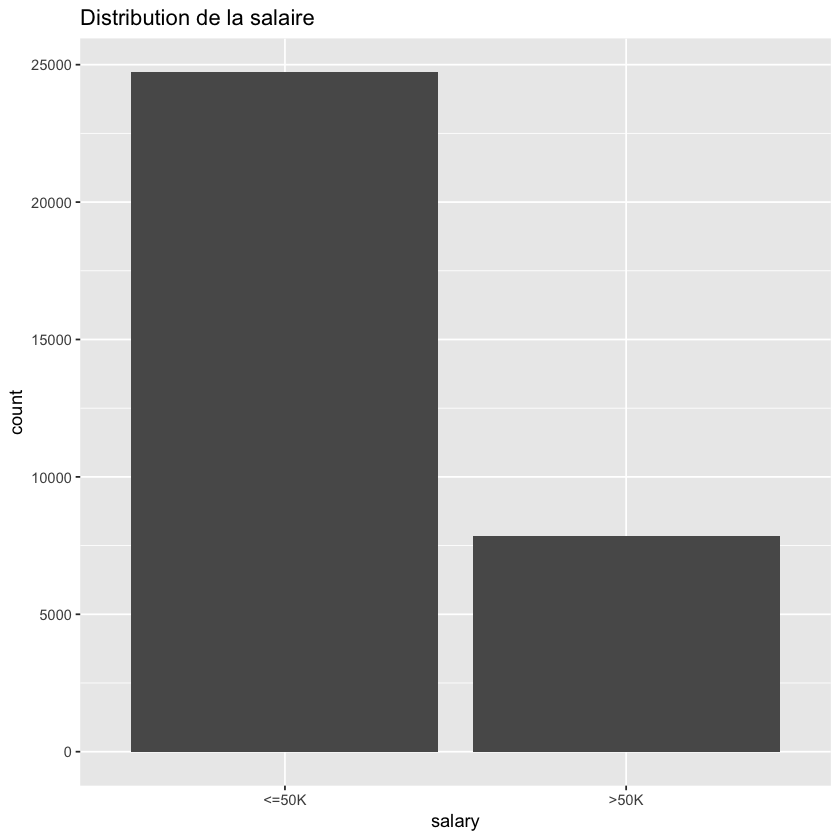

In [16]:
ggplot(df, aes(x=salary)) + geom_bar(stat="count") + ggtitle("Distribution de la salaire")

**Visualisation de salary par rapport à la variable sex**

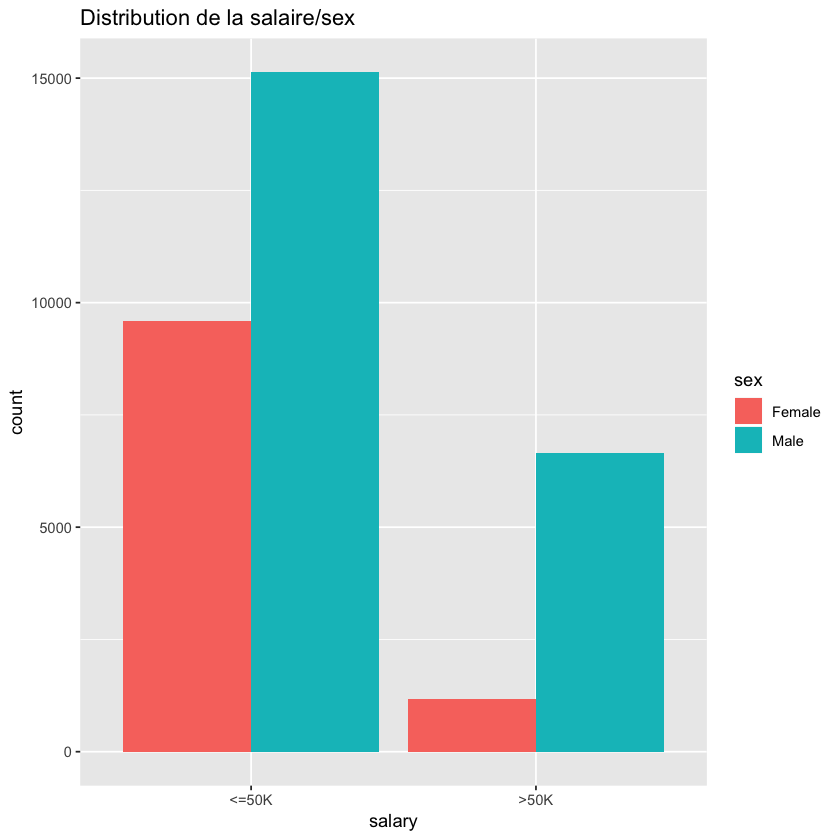

In [17]:
ggplot(df, aes(x=salary, fill=sex)) + 
        geom_bar(stat="count", position=position_dodge()) + 
        ggtitle("Distribution de la salaire/sex")

On peut constater que les hommes gagnent plus que les femmes dans toutes les catégories

**Visualisation de salary par rapport à la variable race**

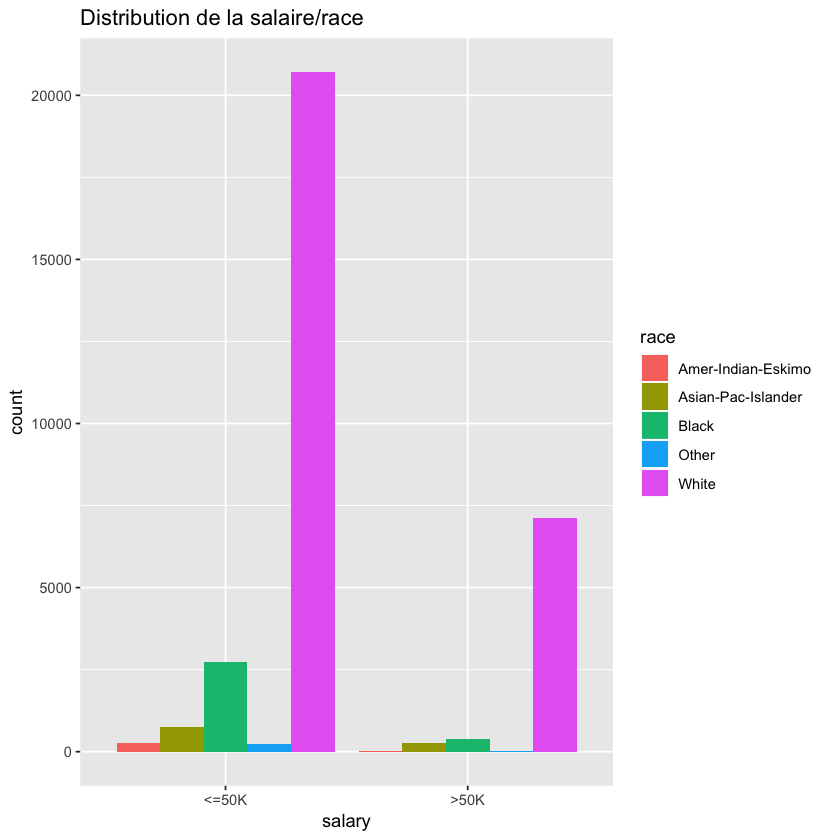

In [18]:
ggplot(df, aes(x=salary, fill=race)) + 
        geom_bar(stat="count", position=position_dodge()) + 
        ggtitle("Distribution de la salaire/race")

Les blancs gagent significativement plus que les autres races

**Explorer la variable workclass**

In [19]:
unique(df$workclass)

[1] State-gov        Self-emp-not-inc Private          Federal-gov     
[5] Local-gov        ?                Self-emp-inc     Without-pay     
[9] Never-worked    
9 Levels: ? Federal-gov Local-gov Never-worked Private ... Without-pay

In [20]:
count(df$workclass)

x,freq
?,1836
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1298
Without-pay,14


On peut constater qu'il y a 1836 valeurs marqués ? dans la variable workclass. On remplace donc ces valeurs ? par la valeur NaN

In [21]:
df$workclass[ df$workclass == "?" ] <- NA
df$workclass = factor(df$workclass)

In [22]:
count(df$workclass)

x,freq
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1298
Without-pay,14
NA,1836


**Visualiser la variable workclass**

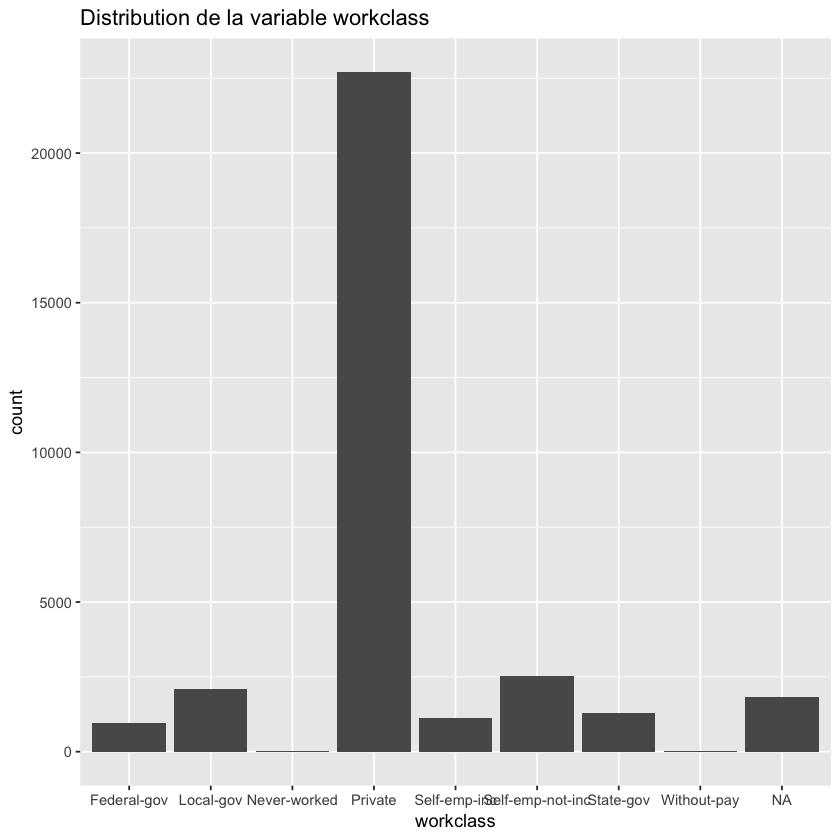

In [23]:
ggplot(df, aes(x=workclass)) + 
        geom_bar(stat="count") + 
        ggtitle("Distribution de la variable workclass")

Il y a énormément de travailleurs privés qu'aux autres catégories employeurs

**Visualisation de salary par rapport à la variable workclass**

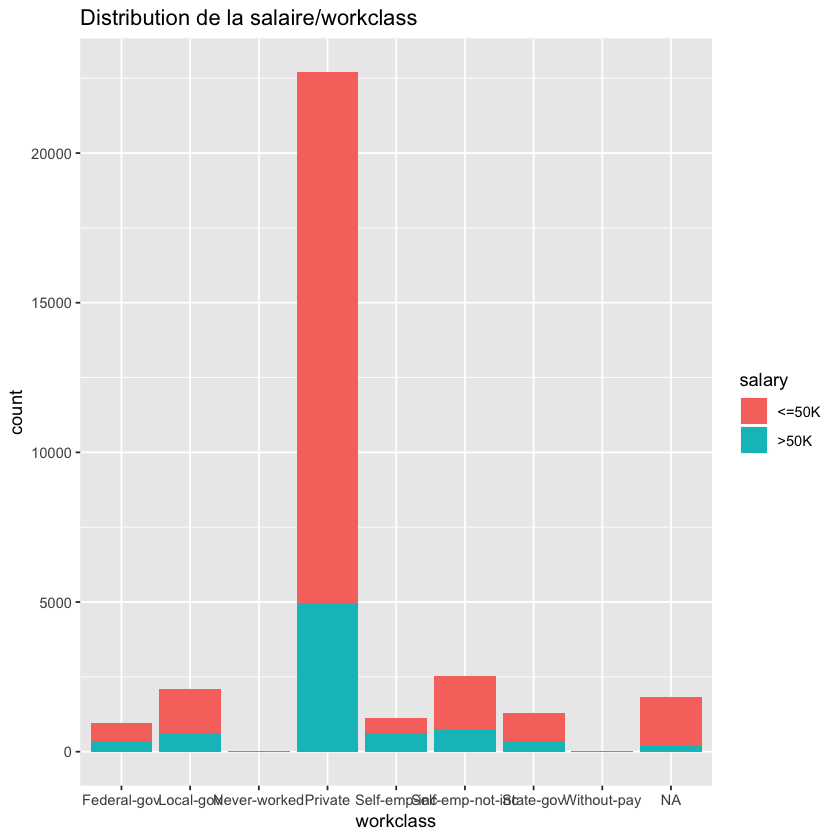

In [24]:
ggplot(df, aes(x=workclass, fill=salary)) + 
        geom_bar(stat="count") + 
        ggtitle("Distribution de la salaire/workclass")

Les employeurs gagent au-dessous de 50K dans la plupart de catégories sauf la class privé

**Explorer la variable occupation**

In [25]:
unique(df$occupation)

[1] Adm-clerical      Exec-managerial   Handlers-cleaners Prof-specialty   
 [5] Other-service     Sales             Craft-repair      Transport-moving 
 [9] Farming-fishing   Machine-op-inspct Tech-support      ?                
[13] Protective-serv   Armed-Forces      Priv-house-serv  
15 Levels: ? Adm-clerical Armed-Forces Craft-repair ... Transport-moving

In [26]:
df$occupation[ df$occupation == "?" ] <- NA
df$occupation = factor(df$occupation)

In [27]:
count(df$occupation)

x,freq
Adm-clerical,3770
Armed-Forces,9
Craft-repair,4099
Exec-managerial,4066
Farming-fishing,994
Handlers-cleaners,1370
Machine-op-inspct,2002
Other-service,3295
Priv-house-serv,149
Prof-specialty,4140


**Visualiser la variable occupation/salary**

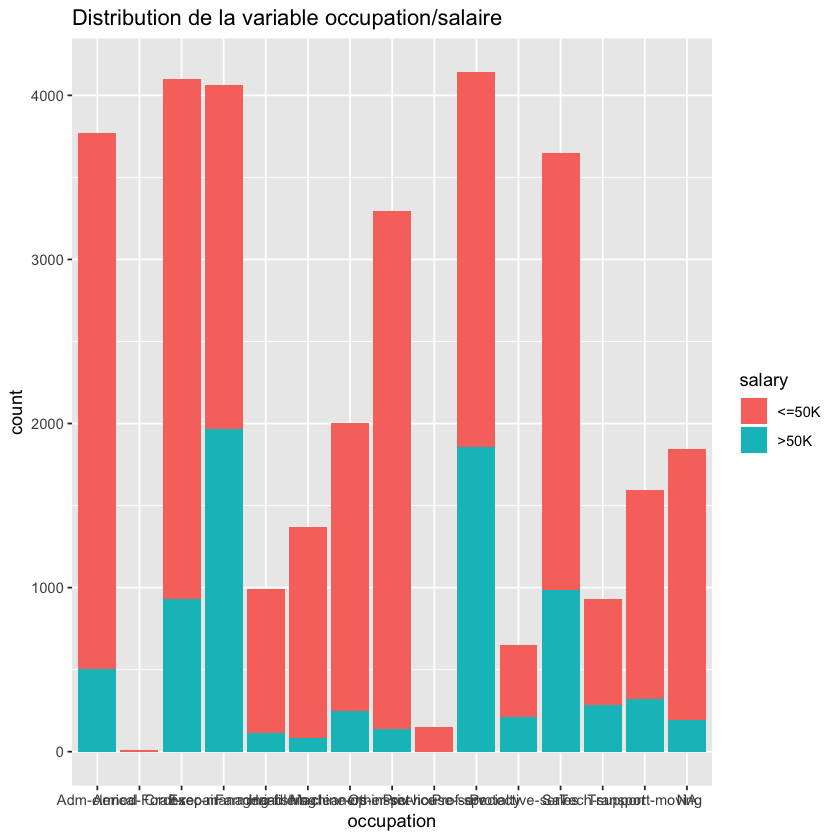

In [28]:
ggplot(df, aes(x=occupation, fill=salary)) + 
        geom_bar(stat="count") + 
        ggtitle("Distribution de la variable occupation/salaire")

**Explorer la variable native country**

In [29]:
unique(df$native_country)

[1] United-States              Cuba                      
 [3] Jamaica                    India                     
 [5] ?                          Mexico                    
 [7] South                      Puerto-Rico               
 [9] Honduras                   England                   
[11] Canada                     Germany                   
[13] Iran                       Philippines               
[15] Italy                      Poland                    
[17] Columbia                   Cambodia                  
[19] Thailand                   Ecuador                   
[21] Laos                       Taiwan                    
[23] Haiti                      Portugal                  
[25] Dominican-Republic         El-Salvador               
[27] France                     Guatemala                 
[29] China                      Japan                     
[31] Yugoslavia                 Peru                      
[33] Outlying-US(Guam-USVI-etc) Scotland                  
[35] Trinadad&Tobago            Greece                    
[37] Nicaragua                  Vietnam                   
[39] Hong                       Ireland                   
[41] Hungary                    Holand-Netherlands        
42 Levels: ? Cambodia Canada China Columbia Cuba Dominican-Republic ... Yugoslavia

In [30]:
df$native_country[df$native_country == "?"] <- NA
df$native_country = factor(df$native_country)

In [31]:
summary(df$native_country)

Cambodia                     Canada 
                        19                        121 
                     China                   Columbia 
                        75                         59 
                      Cuba         Dominican-Republic 
                        95                         70 
                   Ecuador                El-Salvador 
                        28                        106 
                   England                     France 
                        90                         29 
                   Germany                     Greece 
                       137                         29 
                 Guatemala                      Haiti 
                        64                         44 
        Holand-Netherlands                   Honduras 
                         1                         13 
                      Hong                    Hungary 
                        20                         13 
                     India                       Iran 
                       100                         43 
                   Ireland                      Italy 
                        24                         73 
                   Jamaica                      Japan 
                        81                         62 
                      Laos                     Mexico 
                        18                        643 
                 Nicaragua Outlying-US(Guam-USVI-etc) 
                        34                         14 
                      Peru                Philippines 
                        31                        198 
                    Poland                   Portugal 
                        60                         37 
               Puerto-Rico                   Scotland 
                       114                         12 
                     South                     Taiwan 
                        80                         51 
                  Thailand            Trinadad&Tobago 
                        18                         19 
             United-States                    Vietnam 
                     29170                         67 
                Yugoslavia                       NA's 
                        16                        583

**Visualiser la variable native_country**

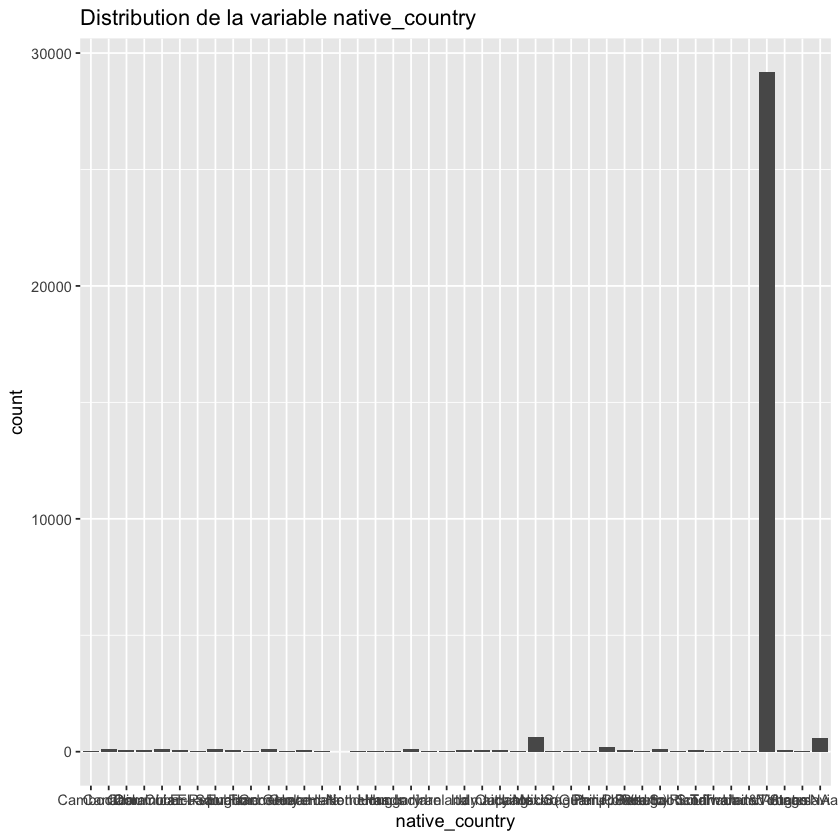

In [32]:
ggplot(df, aes(x=native_country)) + 
        geom_bar(stat="count") + 
        ggtitle("Distribution de la variable native_country")

Les Etat-Unis sont occupés une grande partie parmi les valeurs pour la variable native_country. Ceci peut amener à un résultat biasé lors de la création de modèle

In [33]:
df$native_country <- NULL
categorical <- categorical[categorical != "native_country"]

## 1.3 Explorer les variables numériques

**Extraire des variables numériques**

In [34]:
numerical <- vector()
for (i in colnames(df)){
    if (is.numeric(df[[i]])) {
        numerical <- c(numerical, i)
    }  
}

In [35]:
numerical

[1] "age"            "fnlwgt"         "education_num"  "capital_gain"  
[5] "capital_loss"   "hours_per_week"

In [36]:
head(df[,numerical])

age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
39,77516,13,2174,0,40
50,83311,13,0,0,13
38,215646,9,0,0,40
53,234721,7,0,0,40
28,338409,13,0,0,40
37,284582,14,0,0,40


In [37]:
colSums(is.na(df[,numerical])) ##TODO

age         fnlwgt  education_num   capital_gain   capital_loss 
             0              0              0              0              0 
hours_per_week 
             0

**Explorer la variable age**

In [38]:
length(unique(df$age))

[1] 73

**Visualiser la varibale age**

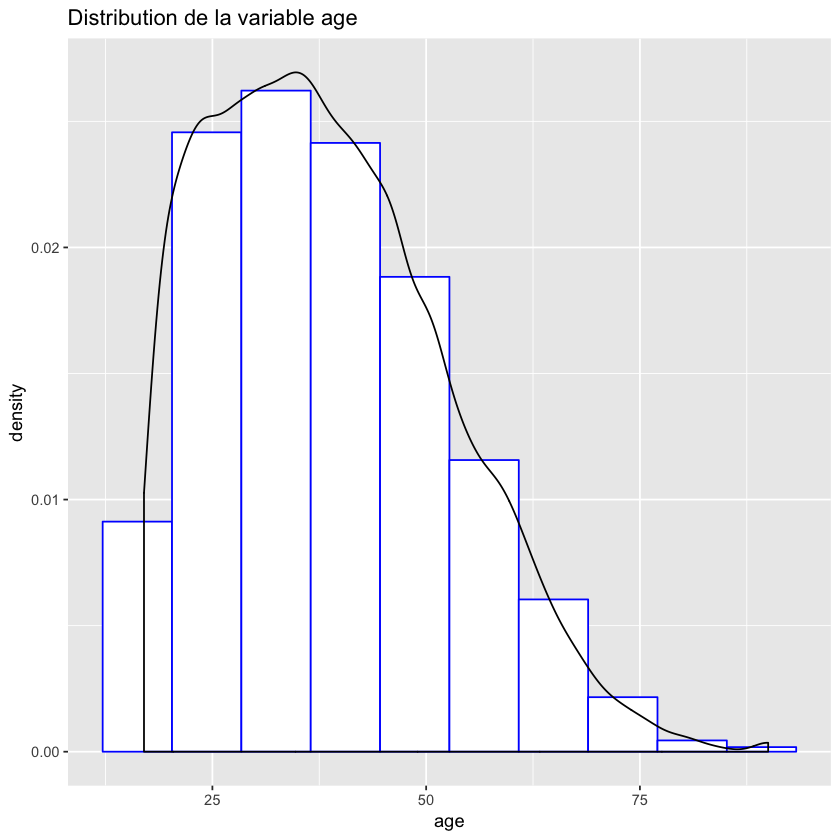

In [39]:
ggplot(df, aes(x=age)) + 
    geom_histogram(aes(y=..density..),      # Histogram with density instead of count on y-axis
                   bins=10, fill="white", color="blue") +
    geom_density(alpha=.2) + # Overlay with transparent density plot
    ggtitle("Distribution de la variable age")

**Détecter les outliers dans la variable age**

In [40]:
##TODO

**Visualisation de salary par rapport à la variable age**

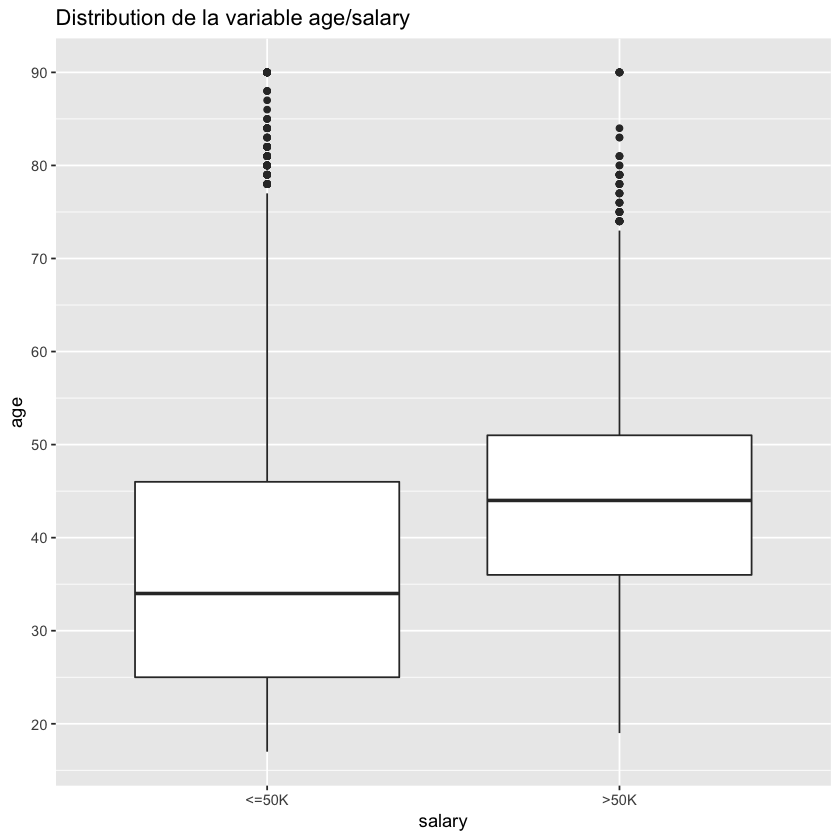

In [41]:
ggplot(df, aes(x=salary, y=age)) + 
geom_boxplot() + 
ggtitle("Distribution de la variable age/salary") +
scale_y_continuous(breaks = scales::pretty_breaks(n = 10))

Les jeunes gagnent moins que les personnes agées

**Visualisation de salary par rapport à la variable sex**

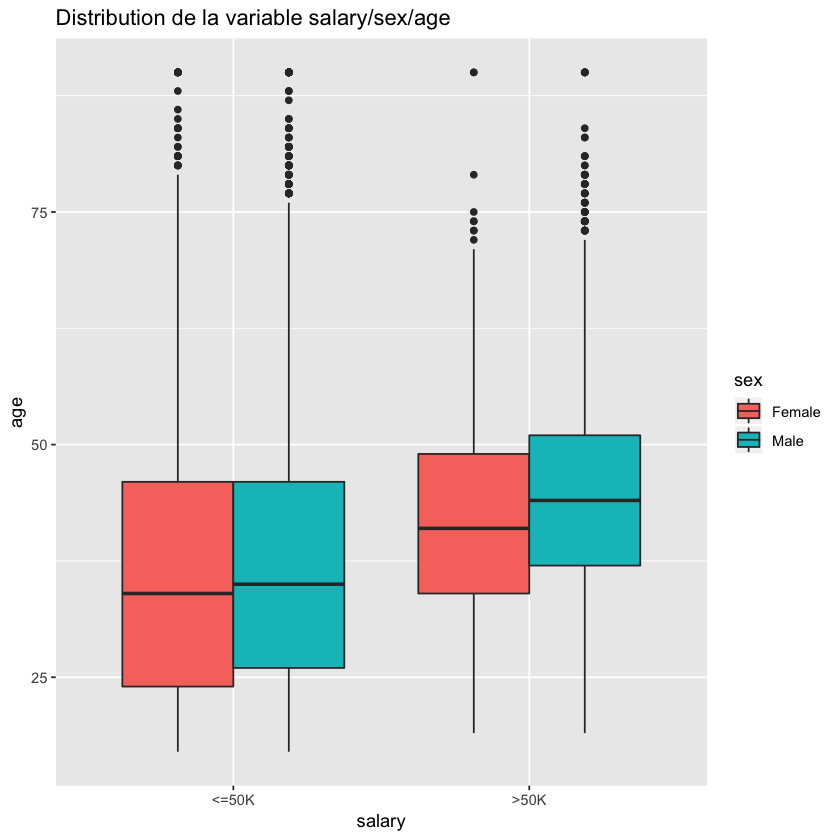

In [42]:
ggplot(df, aes(x=salary, y=age, fill=sex)) + 
  geom_boxplot( position=position_dodge()) + 
    ggtitle("Distribution de la variable salary/sex/age")

**Visualisation de capital_gain par rapport à la variable salary**

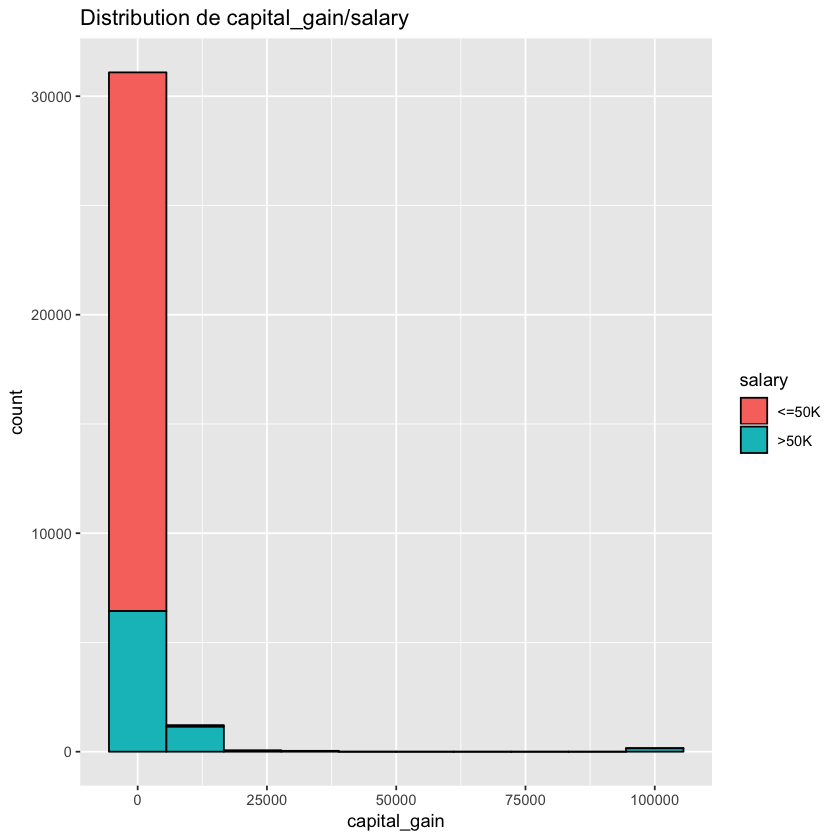

In [43]:
ggplot(df) + aes(x=capital_gain, group=salary, fill=salary) + 
  geom_histogram(bins=10, color='black') + ggtitle('Distribution de capital_gain/salary')

In [44]:
sum(df$capital_gain == 0)/length(df$capital_gain)

[1] 0.9167102

Il existe une biaisé vers la valeur 0 de capital_gain. On supprimer donc la variable capital_gain

In [45]:
df$capital_gain <- NULL
numerical <- numerical[numerical != "capital_gain"]

**Visualisation de capital_loss par rapport à la variable salary**

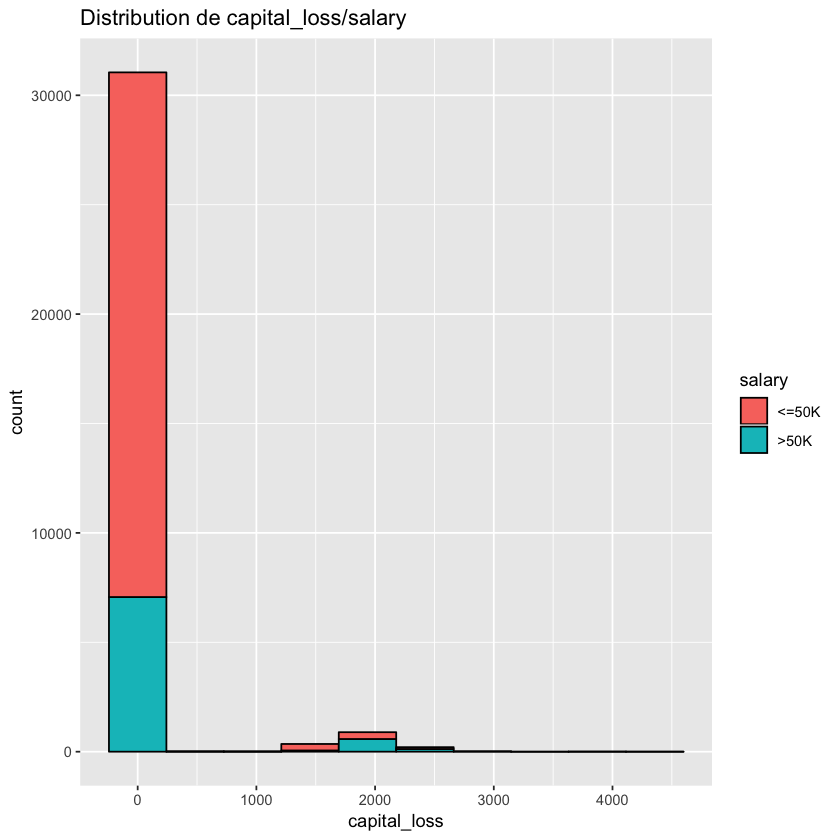

In [46]:
ggplot(df) + aes(x=capital_loss, group=salary, fill=salary) + 
  geom_histogram(bins=10, color='black') + ggtitle('Distribution de capital_loss/salary')

In [47]:
sum(df$capital_loss == 0)/length(df$capital_loss)

[1] 0.9533491

Il existe une biaisé vers la valeur 0 de capital_loss. On supprimer donc la variable capital_loss

In [48]:
df$capital_loss <- NULL
numerical <- numerical[numerical != "capital_loss"]

# 2. Feature Engineering

## 2.1 Remplissage de données manquées

In [49]:
df$native_country[is.na(df$native_country)] <- names(which.max(table(df$native_country)))
df$workclass[is.na(df$workclass)] <- names(which.max(table(df$workclass)))
df$occupation[is.na(df$occupation)] <- names(which.max(table(df$occupation)))

#df = na.omit(df)

## 2.2 Label encoding

In [50]:
newDF <- df

In [51]:
for (i in categorical) {
    enc <- LabelEncoder.fit(df[[i]])
    newDF[[i]] <- transform(enc, df[[i]])
}

In [52]:
head(newDF)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,salary
39,7,77516,10,13,5,1,2,5,2,40,1
50,6,83311,10,13,3,4,1,5,2,13,1
38,4,215646,12,9,1,6,2,5,2,40,1
53,4,234721,2,7,3,6,1,3,2,40,1
28,4,338409,10,13,3,10,6,3,1,40,1
37,4,284582,13,14,3,4,6,5,1,40,1


## 2.3 Corrélation

In [53]:
#Creation de la matrice corrélation
newDF <- round(cor(newDF),2)

#Melt data to bring the correlation values in two axis
melted_data <- melt(newDF)
#head(melted_data)

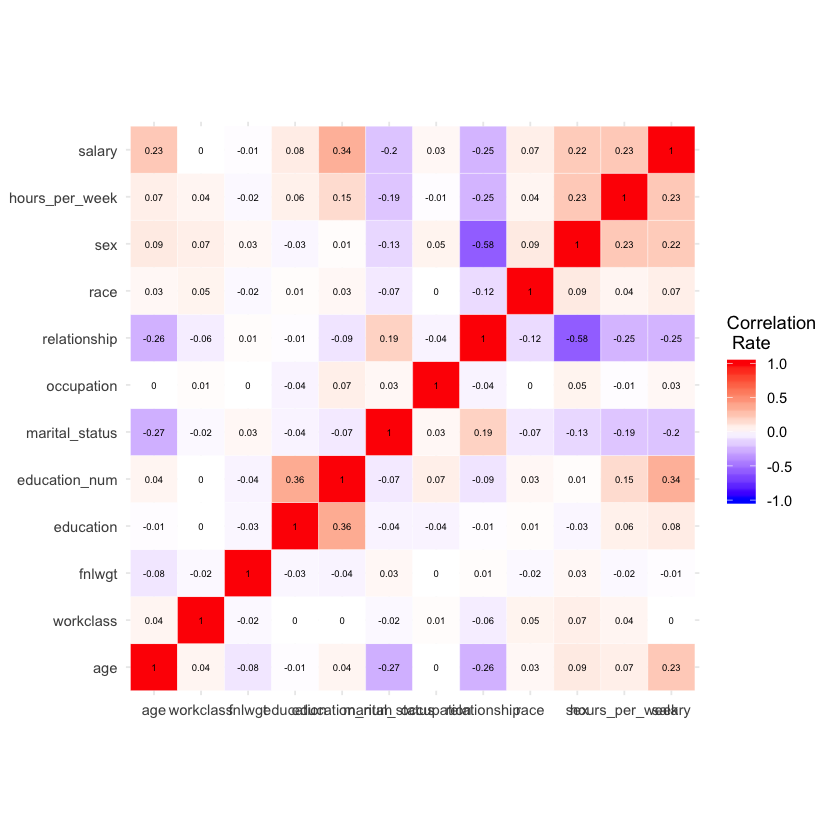

In [54]:
ggheatmap = ggplot(melted_data, aes(Var2, Var1, fill = value)) + geom_tile(color = "white") + scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1, 1), space = "Lab", name = "Correlation \n Rate") + theme_minimal() + coord_fixed()
ggheatmap + geom_text(aes(Var2, Var1, label = value), color = "black", size = 2) + theme(axis.title.x = element_blank(), axis.title.y = element_blank())

Comme on peut voir dans la visualisation heatmap les deux variables education et educations_num sont fortement corrélées, on avait le meme phénomène pour le couple de variable relationship et martial_status. Par conséquent, on pourra enlever les variables relationship et education. Il est préférable de garder les variables numériques pour contruire le modèle

In [55]:
df = subset(df, select = -c(relationship, education))

In [56]:
categorical <- categorical[categorical != "relationship"]
categorical <- categorical[categorical != "education"]

#Splitter la cible
#categorical <- categorical[categorical != "salary"]

In [57]:
testDf <- df

## 2.4 Coupage de données train/test

In [58]:
# Random sample indexes
train_index <- sample(1:nrow(testDf), 0.7 * nrow(testDf))
test_index <- setdiff(1:nrow(testDf), train_index)

# Build X_train, y_train, X_test, y_test
X_train <- testDf[train_index, -10]
y_train <- testDf[train_index, "salary"]

X_test <- testDf[test_index, -10]
y_test <- testDf[test_index, "salary"]

In [59]:
dim(X_train)

[1] 22792     9

In [60]:
dim(X_test)

[1] 9769    9

# 3. Arbre de décision

## 3.1 Arbre standard

**Fonctionne de prédiction**

In [61]:
predictData <- function(model, feature_test, target_test) {
    pred <- predict(model, feature_test, type = "class")
    mc <- table(pred, target_test)
#    print(confusionMatrix(pred, y_test))
    print(mc)
    return(mc)
}

buildMC <- function(table, colNames, rowNames) {
    colLeft <- c(table[1,1], table[2,1])
    colRight <- c(table[1,2], table[2,2])
    mc <- data.frame(colLeft, colRight, row.names=rowNames)
    colnames(mc) <- colNames 
    return (mc)
}

statMC <- function(mc) {
    accuracy <- sum(diag(mc)/(sum(rowSums(mc)))) * 100
    sensitivity <- mc[1,1]/(mc[1,1] + mc[2,1]) #True positive rate
    specificity <- mc[2,2]/(mc[1,2] + mc[2,2])
    pos_pred <- mc[1,1]/(mc[1,1] + mc[1,2])
    neg_pred <- mc[2,2]/(mc[2,1] + mc[2,2])
    #arithmetic_mean <- (recall + true_negative)/2
    #geometric_mean <- sqrt(recall * true_negative)
    
    cat("Accuracy: ", accuracy, "\n")
    cat("Sensitivity: ", sensitivity, "\n") #Precision nombre de positive bien classifié
    cat("Specificity: ", specificity, "\n") #nombre de négative bien classifié
    #cat("Recall: ", recall, "\n")
    cat("Pos Pred Value: ", pos_pred, "\n")
    cat("Neg Pred Value: ", neg_pred, "\n")
    #cat("Arithmetic Mean: ", arithmetic_mean, "\n")
    #cat("Geometric Mean: ", geometric_mean, "\n")
    
    #info <- c(false_positive, recall)
    #return(info)
}

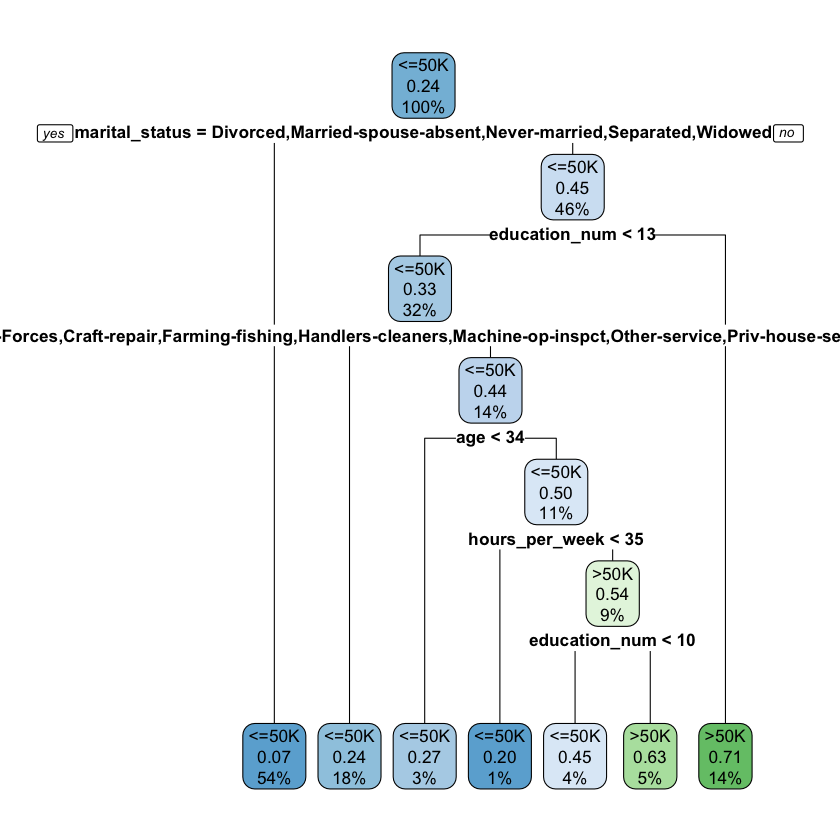

In [62]:
treeModel <- rpart(y_train~., data=X_train, method="class")
#treePredict <- predict(treeModel, X_test, type = "class")
rpart.plot(treeModel)

In [63]:
validate_test <- predictData(treeModel, X_test, y_test)

mc <- validate_test
infoTreeBase <- statMC(mc)

       target_test
pred    <=50K >50K
  <=50K  6844 1101
  >50K    550 1274
Accuracy:  83.0996 
Sensitivity:  0.9256154 
Specificity:  0.5364211 
Pos Pred Value:  0.8614223 
Neg Pred Value:  0.6984649 


## 3.2 Tunnning Modèle

**Pre-Pruning**

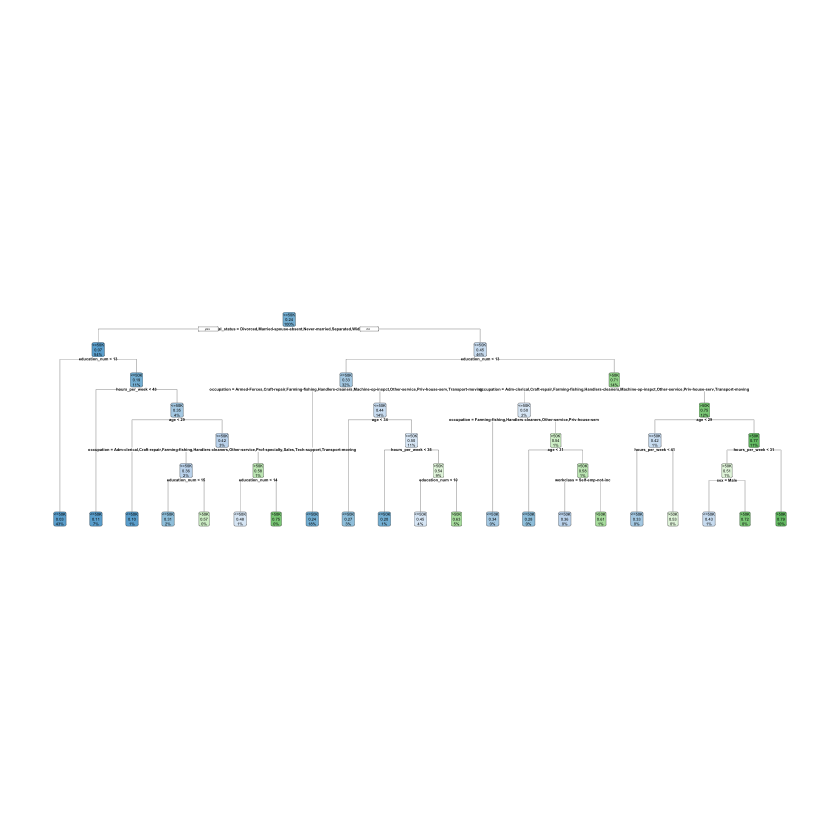

In [64]:
treeModelPre <- rpart(y_train~., data = X_train, method = "class", 
                   control = rpart.control(cp = 0, maxdepth = 6,minsplit = 100))

rpart.plot(treeModelPre)

In [65]:
validate_test_pre <- predictData(treeModelPre, X_test, y_test)

mc <- validate_test_pre
infoTreePre <- statMC(mc)

       target_test
pred    <=50K >50K
  <=50K  6914 1136
  >50K    480 1239
Accuracy:  83.45788 
Sensitivity:  0.9350825 
Specificity:  0.5216842 
Pos Pred Value:  0.858882 
Neg Pred Value:  0.7207679 


# 4. Random Forest

In [66]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [67]:
modelRF = randomForest(y_train~., data = X_train, importance = TRUE)

In [68]:
print(modelRF)


Call:
 randomForest(formula = y_train ~ ., data = X_train, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 16.52%
Confusion matrix:
      <=50K >50K class.error
<=50K 15805 1521  0.08778714
>50K   2245 3221  0.41072082


In [69]:
validate_test <- predictData(modelRF, X_test, y_test)

mc <- validate_test
infoRF <- statMC(mc)

       target_test
pred    <=50K >50K
  <=50K  6767  978
  >50K    627 1397
Accuracy:  83.57048 
Sensitivity:  0.9152015 
Specificity:  0.5882105 
Pos Pred Value:  0.873725 
Neg Pred Value:  0.6902174 


# 5. K Nearest Neighbor

**Encoding des variables catégoriques**

In [70]:
encoder <- dummyVars(~., data = X_train)
X_train_test <- data.frame(predict(encoder, newdata = X_train)) 
X_test_test <- data.frame(predict(encoder, newdata = X_test)) 

In [71]:
head(X_train_test)

,age,workclass.Federal.gov,workclass.Local.gov,workclass.Never.worked,workclass.Private,workclass.Self.emp.inc,workclass.Self.emp.not.inc,workclass.State.gov,workclass.Without.pay,fnlwgt,...,occupation.Tech.support,occupation.Transport.moving,race.Amer.Indian.Eskimo,race.Asian.Pac.Islander,race.Black,race.Other,race.White,sex.Female,sex.Male,hours_per_week
25123,45,0,0,0,1,0,0,0,0,215943,...,0,0,0,0,0,0,1,0,1,40
8051,42,0,0,0,1,0,0,0,0,89073,...,0,0,0,0,0,0,1,0,1,48
20047,44,0,0,0,1,0,0,0,0,60414,...,0,0,0,0,0,0,1,0,1,40
22006,28,0,0,0,1,0,0,0,0,167336,...,0,0,0,0,0,0,1,1,0,45
328,43,0,0,0,1,0,0,0,0,187728,...,0,0,0,0,0,0,1,1,0,50
29668,58,0,0,0,1,0,0,0,0,407138,...,0,0,0,0,0,0,1,0,1,50


In [72]:
# Min-Max Scaling function
#MinMaxScaling <- function(x){
#  return((x-min(x))/(max(x)-min(x)))
#}

In [73]:
#for (i in numerical) {
#    X_train_test[[i]] <- MinMaxScaling(X_train_test[[i]])
#}

In [74]:
pr <- knn(X_train_test,X_test_test,cl=y_train,k=10)
 
##create confusion matrix
tab <- table(pr,y_test)

##this function divides the correct predictions by total number of predictions that tell us how accurate teh model is.
infoKNN <- statMC(tab)

Accuracy:  73.4978 
Sensitivity:  0.9390046 
Specificity:  0.09978947 
Pos Pred Value:  0.7645634 
Neg Pred Value:  0.3444767 


In [75]:
i=1
k.optm=1
for (i in 1:28){ 
    knn.mod <- knn(train=X_train_test,test=X_test_test,cl=y_train,k=i)
    k.optm[i] <- 100 * sum(y_test == knn.mod)/NROW(y_test)
    k=i  
    cat(k,'=',k.optm[i],'\n')
}

1 = 67.33545 
2 = 65.81022 
3 = 69.99693 
4 = 69.94575 
5 = 71.66547 
6 = 71.645 
7 = 72.52534 
8 = 72.75054 
9 = 73.33402 
10 = 73.08834 
11 = 74.16317 
12 = 74.18364 
13 = 74.54192 
14 = 74.47026 
15 = 74.76712 
16 = 74.86949 
17 = 75.06398 
18 = 75.02303 
19 = 75.17658 
20 = 75.00256 
21 = 75.29942 
22 = 75.3506 
23 = 75.3506 
24 = 75.33013 
25 = 75.39154 
26 = 75.41202 
27 = 75.45296 
28 = 75.41202 


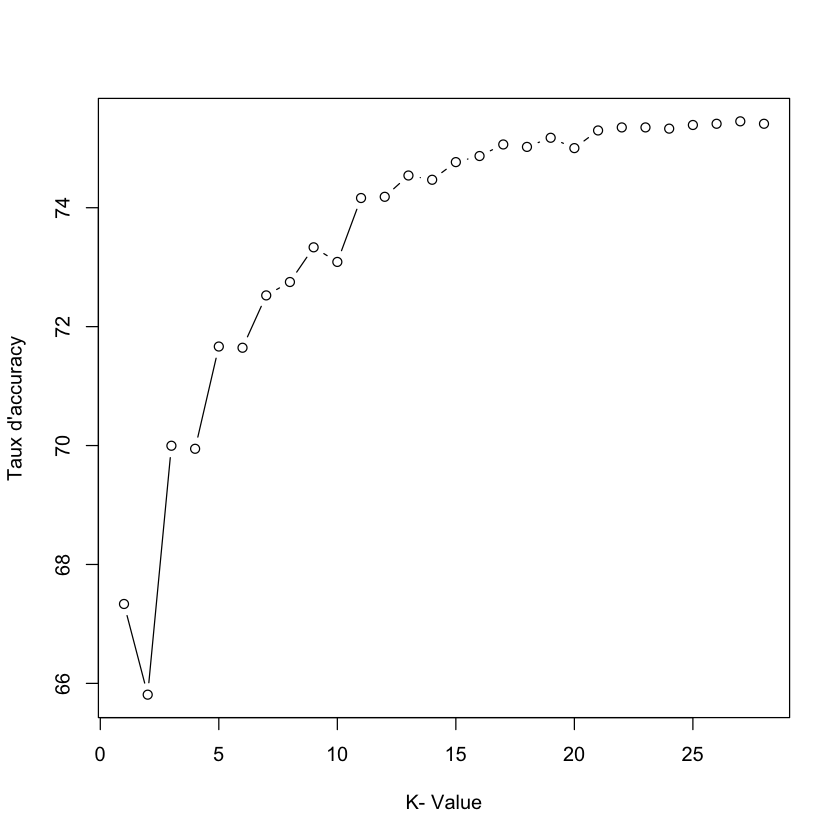

In [76]:
plot(k.optm, type="b", xlab="K- Value",ylab="Taux d'accuracy")

# 6. Tester le modèle

In [77]:
valDf <- read.table("adult.test", 
                 sep = ',', 
                 fill = FALSE, 
                 strip.white = TRUE)

colnames(valDf) <- c("age", "workclass", "fnlwgt", "education", "education_num", "marital_status", 
                 "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", 
                 "hours_per_week", "native_country", "salary")

In [78]:
head(valDf)

age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [79]:
str(valDf)

'data.frame':	16281 obs. of  15 variables:
 $ age           : int  25 38 28 44 18 34 29 63 24 55 ...
 $ workclass     : Factor w/ 9 levels "?","Federal-gov",..: 5 5 3 5 1 5 1 7 5 5 ...
 $ fnlwgt        : int  226802 89814 336951 160323 103497 198693 227026 104626 369667 104996 ...
 $ education     : Factor w/ 16 levels "10th","11th",..: 2 12 8 16 16 1 12 15 16 6 ...
 $ education_num : int  7 9 12 10 10 6 9 15 10 4 ...
 $ marital_status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 3 3 5 5 5 3 5 3 ...
 $ occupation    : Factor w/ 15 levels "?","Adm-clerical",..: 8 6 12 8 1 9 1 11 9 4 ...
 $ relationship  : Factor w/ 6 levels "Husband","Not-in-family",..: 4 1 1 1 4 2 5 1 5 1 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 3 5 5 3 5 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 2 2 2 1 2 ...
 $ capital_gain  : int  0 0 0 7688 0 0 0 3103 0 0 ...
 $ capital_loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours_per_week: int  40 50 40 

In [80]:
cat("Element manqué dans le dataset: ", sum(is.na(valDf)), "\n")

Element manqué dans le dataset:  0 


In [81]:
valDf$native_country <- NULL
valDf$capital_gain <- NULL
valDf$capital_loss <- NULL

In [82]:
valDf$workclass[ valDf$workclass == "?" ] <- NA
valDf$workclass = factor(valDf$workclass)

In [83]:
valDf$occupation[ valDf$occupation == "?" ] <- NA
valDf$occupation = factor(valDf$occupation)

In [84]:
colSums(is.na(valDf))

age      workclass         fnlwgt      education  education_num 
             0            963              0              0              0 
marital_status     occupation   relationship           race            sex 
             0            966              0              0              0 
hours_per_week         salary 
             0              0

In [85]:
#Supprimer les données null dans le dataset (OPTIONELLE)

In [86]:
cat("Taille de dataset avant la suppresion ", dim(valDf), "\n")

Taille de dataset avant la suppresion  16281 12 


In [87]:
valDf = na.omit(valDf)

In [88]:
cat("Taille de dataset apres la suppresion ", dim(valDf), "\n")

Taille de dataset apres la suppresion  15315 12 


In [89]:
#valDf$native_country[is.na(valDf$native_country)] <- names(which.max(table(valDf$native_country)))
valDf$workclass[is.na(valDf$workclass)] <- names(which.max(table(valDf$workclass)))
valDf$occupation[is.na(valDf$occupation)] <- names(which.max(table(valDf$occupation)))

In [90]:
valDf = subset(valDf, select = -c(relationship, education))

In [91]:
head(valDf)

,age,workclass,fnlwgt,education_num,marital_status,occupation,race,sex,hours_per_week,salary
1,25,Private,226802,7,Never-married,Machine-op-inspct,Black,Male,40,<=50K.
2,38,Private,89814,9,Married-civ-spouse,Farming-fishing,White,Male,50,<=50K.
3,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,White,Male,40,>50K.
4,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Black,Male,40,>50K.
6,34,Private,198693,6,Never-married,Other-service,White,Male,30,<=50K.
8,63,Self-emp-not-inc,104626,15,Married-civ-spouse,Prof-specialty,White,Male,32,>50K.


In [92]:
testDf <- valDf

In [93]:
head(testDf)

,age,workclass,fnlwgt,education_num,marital_status,occupation,race,sex,hours_per_week,salary
1,25,Private,226802,7,Never-married,Machine-op-inspct,Black,Male,40,<=50K.
2,38,Private,89814,9,Married-civ-spouse,Farming-fishing,White,Male,50,<=50K.
3,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,White,Male,40,>50K.
4,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Black,Male,40,>50K.
6,34,Private,198693,6,Never-married,Other-service,White,Male,30,<=50K.
8,63,Self-emp-not-inc,104626,15,Married-civ-spouse,Prof-specialty,White,Male,32,>50K.


In [94]:
X_validation <- testDf[, -10]
y_validation <- testDf[, "salary"]

In [95]:
dim(X_validation)

[1] 15315     9

## 6.2 Arbre de décision

In [96]:
validate_test_set <- predictData(treeModelPre, X_validation, y_validation)
mc <- validate_test_set
infoDTVal <- statMC(mc)

       target_test
pred    <=50K. >50K.
  <=50K  10758  1777
  >50K     785  1995
Accuracy:  83.2713 
Sensitivity:  0.9319934 
Specificity:  0.5288971 
Pos Pred Value:  0.8582369 
Neg Pred Value:  0.7176259 


## 6.3 Random Forest

In [97]:
for (i in colnames(X_train)) {
    levels(X_validation[[i]]) <- levels(X_train[[i]])
}

In [98]:
str(X_validation)

'data.frame':	15315 obs. of  9 variables:
 $ age           : int  25 38 28 44 34 63 24 55 65 36 ...
 $ workclass     : Factor w/ 8 levels "Federal-gov",..: 4 4 2 4 4 6 4 4 4 1 ...
 $ fnlwgt        : int  226802 89814 336951 160323 198693 104626 369667 104996 184454 212465 ...
 $ education_num : int  7 9 12 10 6 15 10 4 9 13 ...
 $ marital_status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 5 3 3 3 5 3 5 3 3 3 ...
 $ occupation    : Factor w/ 14 levels "Adm-clerical",..: 7 5 11 7 8 10 8 3 7 1 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 3 5 5 3 5 5 5 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 1 2 2 2 ...
 $ hours_per_week: int  40 50 40 40 30 32 40 10 40 40 ...


In [99]:
str(X_test)

'data.frame':	9769 obs. of  9 variables:
 $ age           : int  38 53 49 52 42 23 32 38 40 43 ...
 $ workclass     : Factor w/ 8 levels "Federal-gov",..: 4 4 4 6 4 4 4 4 4 4 ...
 $ fnlwgt        : int  215646 234721 160187 209642 159449 122272 186824 28887 193524 117037 ...
 $ education_num : int  9 7 5 9 13 13 9 7 16 7 ...
 $ marital_status: Factor w/ 7 levels "Divorced","Married-AF-spouse",..: 1 3 4 3 3 5 5 3 3 3 ...
 $ occupation    : Factor w/ 14 levels "Adm-clerical",..: 6 6 8 4 4 1 7 12 10 14 ...
 $ race          : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 3 3 5 5 5 5 5 5 5 ...
 $ sex           : Factor w/ 2 levels "Female","Male": 2 2 1 2 2 1 2 2 2 2 ...
 $ hours_per_week: int  40 40 16 45 40 30 40 50 60 40 ...


In [100]:
validate_test_set <- predictData(modelRF, X_validation, y_validation)
mc <- validate_test_set
infoRFVal <- statMC(mc)

       target_test
pred    <=50K. >50K.
  <=50K  10476  1585
  >50K    1067  2187
Accuracy:  82.68364 
Sensitivity:  0.907563 
Specificity:  0.5797985 
Pos Pred Value:  0.8685847 
Neg Pred Value:  0.6720959 


## 6.4 KNN

In [101]:
X_validation_test <- data.frame(predict(encoder, newdata = X_validation)) 

In [102]:
pr <- knn(X_train_test,X_validation_test,cl=y_train,k=25)
 
##create confusion matrix
tab <- table(pr,y_validation)

##this function divides the correct predictions by total number of predictions that tell us how accurate teh model is.
infoKNN <- statMC(tab)

Accuracy:  74.97225 
Sensitivity:  0.9907303 
Specificity:  0.01219512 
Pos Pred Value:  0.7542541 
Neg Pred Value:  0.3006536 


## Cross validation

In [103]:
encoder <- dummyVars(" ~ .", data=df[, names(df) != "salary"])
dfCV <- data.frame(predict(encoder, newdata = df))
dfCV$salary <- df$salary

In [104]:
head(dfCV)

age,workclass.Federal.gov,workclass.Local.gov,workclass.Never.worked,workclass.Private,workclass.Self.emp.inc,workclass.Self.emp.not.inc,workclass.State.gov,workclass.Without.pay,fnlwgt,...,occupation.Transport.moving,race.Amer.Indian.Eskimo,race.Asian.Pac.Islander,race.Black,race.Other,race.White,sex.Female,sex.Male,hours_per_week,salary
39,0,0,0,0,0,0,1,0,77516,...,0,0,0,0,0,1,0,1,40,<=50K
50,0,0,0,0,0,1,0,0,83311,...,0,0,0,0,0,1,0,1,13,<=50K
38,0,0,0,1,0,0,0,0,215646,...,0,0,0,0,0,1,0,1,40,<=50K
53,0,0,0,1,0,0,0,0,234721,...,0,0,0,1,0,0,0,1,40,<=50K
28,0,0,0,1,0,0,0,0,338409,...,0,0,0,1,0,0,1,0,40,<=50K
37,0,0,0,1,0,0,0,0,284582,...,0,0,0,0,0,1,1,0,40,<=50K


In [105]:
train_control <- trainControl(method="cv", number=10)
# Fit Decision Tree
model <- train(salary~., data=dfCV, trControl=train_control, method="rpart")
# Summarise Results
print(model)

CART 

32561 samples
   40 predictor
    2 classes: '<=50K', '>50K' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 29305, 29305, 29305, 29305, 29305, 29305, ... 
Resampling results across tuning parameters:

  cp           Accuracy   Kappa    
  0.006121668  0.8230089  0.4663919
  0.006217319  0.8212279  0.4528276
  0.124920291  0.7869853  0.2020274

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.006121668.


In [106]:
#n <- nrow(dfCV) #Nb observations
#K <- 10 #10-validation croisée
#taille <- n%/%K #Taille chaque bloc
#set.seed(5) #Obtenir la meme séquence tout le temps
#alea <- runif(n) 
#rang <- rank(alea)
#bloc <- (rang-1)%/%taille + 1#Numeroter de bloc
#bloc <- as.factor(bloc)
#print(summary(bloc))

In [107]:
#class(bloc)

In [108]:
#for (k in 1:K) {
#    treeModel <- rpart(salary~., data=dfCV[bloc != k], method="class")
#    treePredict <- predict(treeModel, dfCV[bloc == k], type = "class")
#    matrixConfus <- table(dfCV$salary[bloc==k], treePredict)
#    mc
    #rpart.plot(treeModel)
#}

# AOC

In [109]:
#dd1 <- data.frame(FP = infoDT[1], TP = infoDT[2])
#dd2 <- data.frame(FP = infoKNN[1], TP = infoKNN[2])

In [110]:
#g <- ggplot() + 
#  geom_line(data = dd1, aes(x = FP, y = TP, color = 'Decision Tree')) + 
#  geom_line(data = dd2, aes(x = FP, y = TP, color = 'K-NN')) +
#  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1)) +
#  ggtitle('ROC Curve') + 
#  labs(x = 'False Positive Rate', y = 'True Positive Rate') #
#g +  scale_colour_manual(name = 'Classifier', values = c('Decision Tree'='#E69F00', 
#                                               'K-NN'='#56B4E9'))